2101 2021 Afghanistan
e
2100 2021 Afghanistan
e
2099 2021 Afghanistan
e
2098 2021 Afghanistan
e
2097 2021 Afghanistan
e
2096 2021 Afghanistan
e
2095 2021 Afghanistan
e
2094 2021 Afghanistan
e
2093 2021 Afghanistan
e
2092 2021 Afghanistan
e
2091 2021 Afghanistan
e
2090 2021 Afghanistan
e
2089 2021 Afghanistan
e
2088 2021 Afghanistan
e
2087 2021 Afghanistan
e
2086 2021 Afghanistan
e
2085 2021 Afghanistan
e
2084 2021 Afghanistan
e
2083 2021 Afghanistan
e
2082 2021 Afghanistan
e
2081 2021 Afghanistan
e
2080 2021 Afghanistan
e
2079 2021 Afghanistan
e
2078 2021 Afghanistan
e
2077 2021 Afghanistan
e
2076 2021 Afghanistan
e
2075 2021 Afghanistan
e
2074 2021 Afghanistan
e
2073 2021 Afghanistan
e
2072 2021 Afghanistan
e
2071 2021 Afghanistan
e
2070 2021 Afghanistan
e
2069 2021 Afghanistan
e
2068 2021 Afghanistan
e
2067 2021 Afghanistan
e
2066 2021 Afghanistan
e
2065 2021 Afghanistan
e
2064 2021 Afghanistan
e
2063 2021 Afghanistan
e
2062 2021 Afghanistan
e
2061 2021 Afghanistan
e
2060 2021 Afghan

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


United States of America,2020,Medium,77.4144

2020 2021 United States of America
e
2019 2021 United States of America
e
2018 2021 United States of America
e
2017 2021 United States of America
e
2016 2021 United States of America
e
2015 2021 United States of America
e
2014 2021 United States of America
e
2013 2021 United States of America
e
2012 2021 United States of America
e
2011 2021 United States of America
e
2010 2021 United States of America
e
2009 2021 United States of America
e
2008 2021 United States of America
e
2007 2021 United States of America
e
2006 2021 United States of America
e
2005 2021 United States of America
e
2004 2021 United States of America
e
2003 2021 United States of America
e
2002 2021 United States of America
e
2001 2021 United States of America
e
2000 2021 United States of America
e
1999 2021 United States of America
e
1998 2021 United States of America
e
1997 2021 United States of America
e
1996 2021 United States of America
e
1995 2021 United States of Am

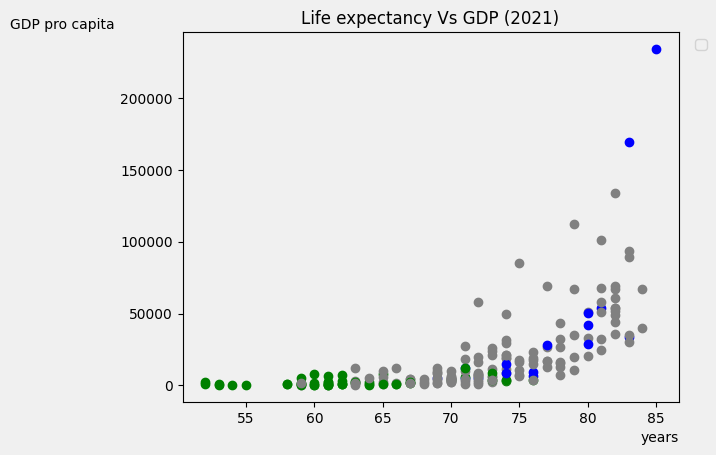

In [12]:
import matplotlib.pyplot as plt

f = open("/workspace/VS/DataSet/StatesOfEurope", "r")
line = f.readline()
europe = []
while line != "":
    europe.append(line[:len(line)-1])
    line = f.readline()
f.close()

f = open("/workspace/VS/DataSet/StatesOfAfrica", "r")
line = f.readline()
africa = []
while line != "":
    africa.append(line[:len(line)-1])
    line = f.readline()
f.close()

f = open("/workspace/VS/DataSet/GDP pro capita.csv", "r")
line = f.readline()
stati = []
while line != "":
    elments = line.split(",")
    if elments[0] not in stati:
        stati.append(elments[0])
    line = f.readline()
f.close()

fGdp = open("/workspace/VS/DataSet/GDP pro capita.csv", "r")
fLe = open("/workspace/VS/DataSet/LifeExpGrosso.csv", "r")
graphColor = "#f0f0f0"
plt.figure(facecolor = graphColor)
plt.axes(facecolor = graphColor)
lGdp = fGdp.readline()
elemGdp = lGdp.split(",")
lLe = fLe.readline()
elemLe = lLe.split(",")
while lGdp != "" and lLe != "":
    print(elemLe[1] + " 2021 " + elemLe[0])
    if elemLe[1] == "2021" and elemLe[0] in stati :
        print("a")
        while True:
            if elemGdp[1] == "2021" and elemLe[0] == elemGdp[0] :
                print("c")
                break
            lGdp = fGdp.readline()
            elemGdp = lGdp.split(",")
            print("b")
        # selezione colore e se e quali label mettere a legenda, suddiviso per aspettativa di vita
        #if  int(float(elemLe[3])) < 50:
        #    plt.scatter(int(float(elemLe[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#f03b20")
        #elif  50 <= int(float(elemLe[3])) < 60:
        #    plt.scatter(int(float(elemLe[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#fe9929")
        #elif  60 <= int(float(elemLe[3])) < 70:
        #    plt.scatter(int(float(elemLe[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#d9f0a3")
        #elif  70 <= int(float(elemLe[3])) < 80:
        #    plt.scatter(int(float(elemLe[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#78c679")
        #elif  80 <= int(float(elemLe[3])):
        #    plt.scatter(int(float(elemLe[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#006837")
        #
        print("d")
        if elemLe[0] in europe:
            plt.scatter(int(float(elemLe[3])), int(float(elemGdp[3])), color = 'blue')
        elif elemLe[0] in africa:
            plt.scatter(int(float(elemLe[3])), int(float(elemGdp[3])), color = 'green')
        else:
            plt.scatter(int(float(elemLe[3])), int(float(elemGdp[3])), color = 'gray')
        lLe = fLe.readline()
        elemLe = lLe.split(",")
        print(lLe)
    else:
        lLe = fLe.readline()
        elemLe = lLe.split(",")
        print("e")
fGdp.close()
fLe.close() 

plt.legend(ncol = 3, bbox_to_anchor=(1.02, 1), loc='upper left', facecolor = graphColor)
plt.title("Life expectancy Vs GDP (2021)")
plt.xlabel("years", loc='right')
plt.ylabel("GDP pro capita", rotation='horizontal', loc = 'top')
plt.show()